In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [195]:
# Contour plot of bivariate normal pdf

vals= np.arange(-4,4,0.01)
X, Y =np.meshgrid(vals,vals)

Z= np.zeros(X.shape)
rho = 0.5
cov = np.array([[1.,rho],[rho,1]])

cov_inv = np.linalg.inv(cov)
det = np.linalg.det(cov)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        point = np.array([X[i,j],Y[i,j]])
        pdf = np.exp(-(np.dot(point,np.dot(cov_inv, point)))/2.)/( 2*np.pi*np.sqrt(det) )
        Z[i,j]=pdf

        


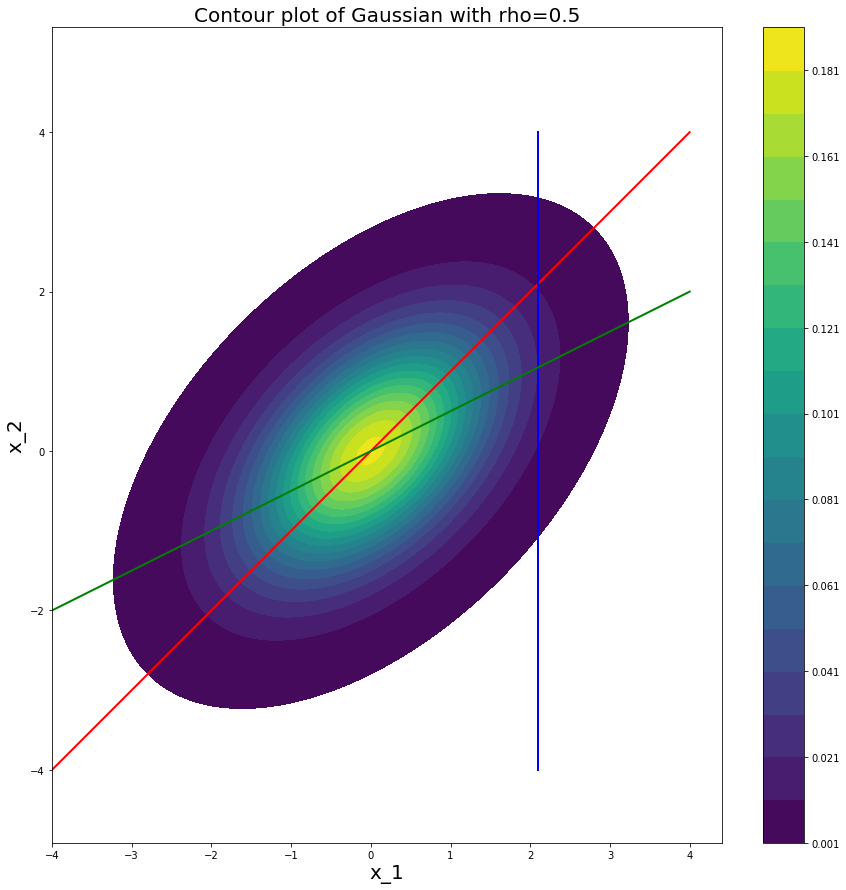

In [197]:
fig =  plt.figure(figsize=(15,15))
ax = fig.gca()

plt.axis('equal')
plt.xlabel('x_1', fontsize=20)
plt.ylabel('x_2', fontsize=20)
plt.title('Contour plot of Gaussian with rho='+str(rho), fontsize=20)
plt.contourf(X,Y,Z, levels=np.arange(0.001,Z.max()+0.01,0.01) )
plt.plot([-4,4],[-4*np.sign(rho),4*np.sign(rho)],'r-', lw=2)

a=2.1

plt.plot([a,a],[-4,4], 'b-', lw =2 )
plt.plot([-4,4],[-rho*4,rho*4],'g-', lw=2)

# plt.plot([-rho*4,rho*4], [-4,4],'g-', lw=2)
# plt.plot([-4,4],[a,a], 'b-', lw =2 )

plt.colorbar()        
        


(array([4.58835597e-05, 4.58835597e-05, 4.58835597e-05, 1.37650679e-04,
        4.12952037e-04, 1.23885611e-03, 2.01887663e-03, 3.90010257e-03,
        8.94729414e-03, 1.50498076e-02, 2.12440881e-02, 3.82210052e-02,
        6.21263398e-02, 8.99317770e-02, 1.27556296e-01, 1.72705719e-01,
        2.24370607e-01, 2.75576660e-01, 3.21139034e-01, 3.60277711e-01,
        3.93910360e-01, 4.06528339e-01, 3.85238367e-01, 3.64728416e-01,
        3.19257808e-01, 2.67959989e-01, 2.11982046e-01, 1.66098486e-01,
        1.19434906e-01, 8.49304690e-02, 5.62532442e-02, 3.79457039e-02,
        2.23911771e-02, 1.22509104e-02, 7.47902023e-03, 3.76245190e-03,
        1.88122595e-03, 7.34136955e-04, 4.58835597e-04, 1.37650679e-04]),
 array([-4.66570936, -4.44776638, -4.22982339, -4.0118804 , -3.79393742,
        -3.57599443, -3.35805145, -3.14010846, -2.92216548, -2.70422249,
        -2.4862795 , -2.26833652, -2.05039353, -1.83245055, -1.61450756,
        -1.39656457, -1.17862159, -0.9606786 , -0.74273562,

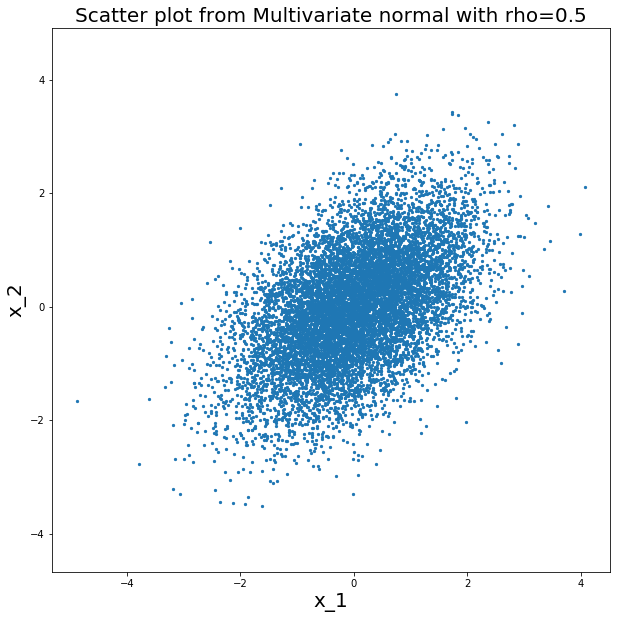

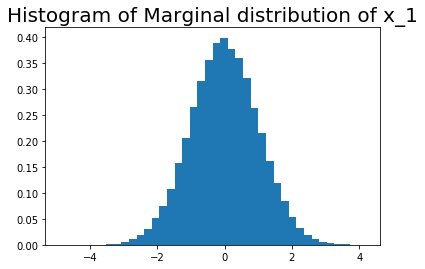

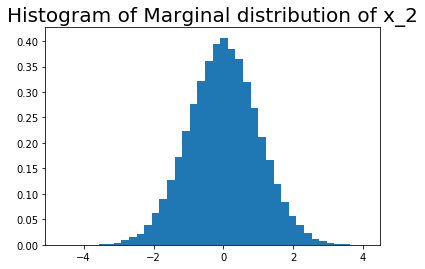

In [198]:
# Joint and marginals of bivariate normal : Simulation

z=np.random.randn(2,100000)
A= np.linalg.cholesky(cov)
x = np.dot(A,z)
plt.figure(figsize=(10,10))
plt.axis('equal')
plt.title('Scatter plot from Multivariate normal with rho='+str(rho), fontsize=20)
plt.xlabel('x_1', fontsize=20)
plt.ylabel('x_2', fontsize=20)
plt.scatter(x[0,:10000],x[1,:10000], s=5)


plt.figure()
plt.title('Histogram of Marginal distribution of x_1', fontsize=20)
plt.hist(x[0,:], bins=40, density=True)


plt.figure()
plt.title('Histogram of Marginal distribution of x_2', fontsize=20)
plt.hist(x[1,:], bins=40, density=True)




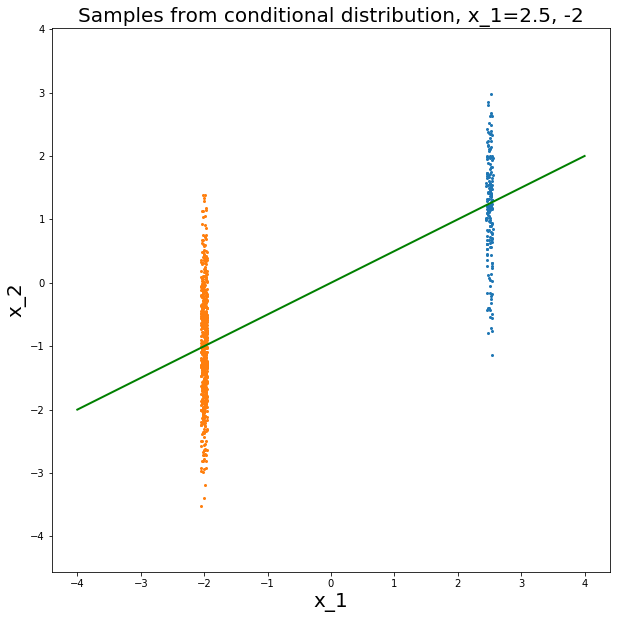

In [199]:
# Conditional distributions of bivarite normals, fix x_1

x_1_fix1  = 2.5
x_1_fix2 = -2


plt.figure(figsize=(10,10))
plt.axis('equal')
plt.title('Samples from conditional distribution, x_1='+str(x_1_fix1)+', '+str(x_1_fix2) , fontsize=20)
plt.xlabel('x_1', fontsize=20)
plt.ylabel('x_2', fontsize=20)

select_indices = (x[0,:] >= x_1_fix1-0.05) * (x[0,:] <= x_1_fix1+0.05)
x_select = x[:,select_indices]
plt.scatter(x_select[0,:],x_select[1,:], s=4)

select_indices = (x[0,:] >= x_1_fix2-0.05) * (x[0,:] <= x_1_fix2+0.05)
x_select = x[:,select_indices]
plt.scatter(x_select[0,:],x_select[1,:], s=4)

plt.plot([-4, 4],[-1*rho*4, rho*4],'g-',lw=2)



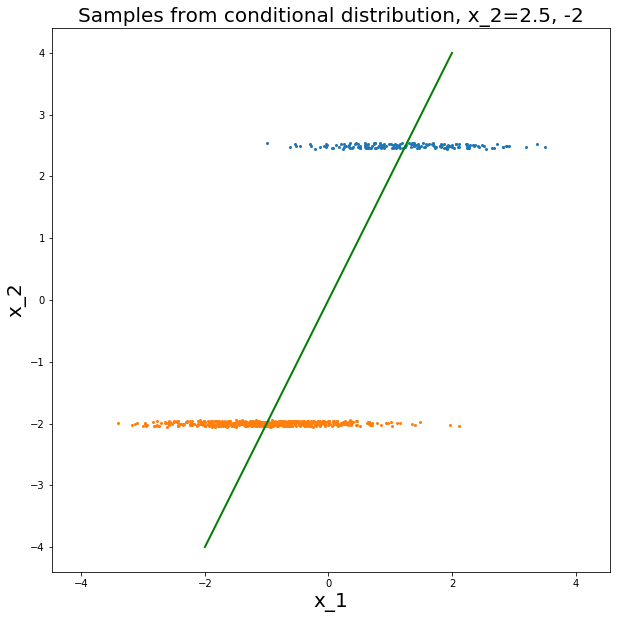

In [200]:
# Conditional distributions of bivarite normals, fix x_2

x_2_fix1  = 2.5
x_2_fix2 = -2


plt.figure(figsize=(10,10))
plt.axis('equal')
plt.title('Samples from conditional distribution, x_2='+str(x_1_fix1)+', '+str(x_1_fix2) , fontsize=20)
plt.xlabel('x_1', fontsize=20)
plt.ylabel('x_2', fontsize=20)

select_indices = (x[1,:] >= x_2_fix1-0.05) * (x[1,:] <= x_2_fix1+0.05)
x_select = x[:,select_indices]
plt.scatter(x_select[0,:],x_select[1,:], s=4)

select_indices = (x[1,:] >= x_2_fix2-0.05) * (x[1,:] <= x_2_fix2+0.05)
x_select = x[:,select_indices]
plt.scatter(x_select[0,:],x_select[1,:], s=4)

plt.plot([-1*rho*4, rho*4], [-4, 4],'g-',lw=2)


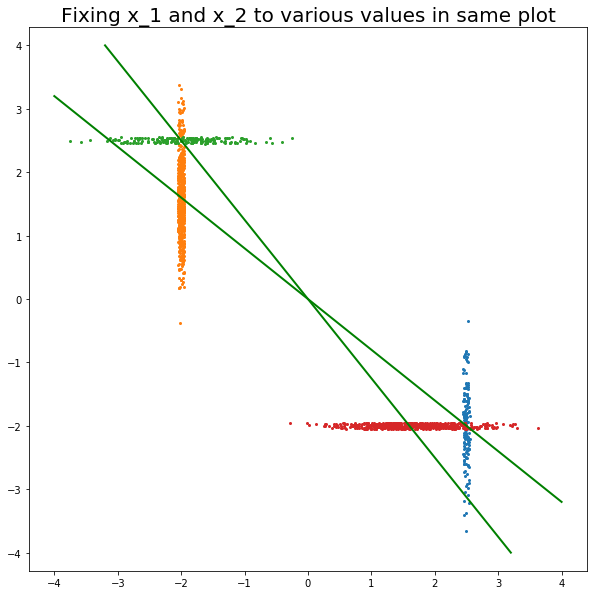

In [189]:
plt.figure(figsize=(10,10))
plt.axis('equal')
plt.title('Fixing x_1 and x_2 to various values in same plot' , fontsize=20)


select_indices = (x[0,:] >= x_1_fix1-0.05) * (x[0,:] <= x_1_fix1+0.05)
x_select = x[:,select_indices]
plt.scatter(x_select[0,:],x_select[1,:], s=4)

select_indices = (x[0,:] >= x_1_fix2-0.05) * (x[0,:] <= x_1_fix2+0.05)
x_select = x[:,select_indices]
plt.scatter(x_select[0,:],x_select[1,:], s=4)

plt.plot([-4, 4],[-1*rho*4, rho*4],'g-',lw=2)

select_indices = (x[1,:] >= x_2_fix1-0.05) * (x[1,:] <= x_2_fix1+0.05)
x_select = x[:,select_indices]
plt.scatter(x_select[0,:],x_select[1,:], s=4)

select_indices = (x[1,:] >= x_2_fix2-0.05) * (x[1,:] <= x_2_fix2+0.05)
x_select = x[:,select_indices]
plt.scatter(x_select[0,:],x_select[1,:], s=4)

plt.plot([-1*rho*4, rho*4], [-4, 4],'g-',lw=2)

